In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import learning_curve
# from tensorflow.contrib.learn.python.learn.datasets import mnist

http://yann.lecun.com/exdb/mnist/

In [22]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
print ('输入数据:',mnist.train.images)
print ('输入数据打shape:',mnist.train.images.shape)

输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打shape: (55000, 784)


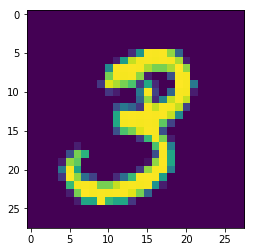

In [22]:
im = mnist.train.images[1].reshape([-1, 28])
plt.imshow(im)

In [10]:
mnist.train

In [23]:
print ('test:',mnist.test.images.shape)
print ('validation:',mnist.validation.images.shape)

test: (10000, 784)
validation: (5000, 784)


In [24]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# minist 分类

In [5]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [6]:
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [7]:
pred = tf.nn.softmax(tf.matmul(x, W) + b)

In [8]:
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
learning_rate = 0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [50]:
training_epochs = 25
batch_size = 100
display_step = 1
saver = tf.train.Saver()
model_path = "log/521model.ckpt"

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={
                            x: batch_xs, y: batch_ys})
            avg_cost += c / total_batch

        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(avg_cost))

    print(" Finished!")
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval(
        {x: mnist.test.images, y: mnist.test.labels}))
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

Epoch: 0001 cost= 7.669387419
Epoch: 0002 cost= 4.397993157
Epoch: 0003 cost= 3.217609420
Epoch: 0004 cost= 2.605007966
Epoch: 0005 cost= 2.221673830
Epoch: 0006 cost= 1.956336019
Epoch: 0007 cost= 1.762206330
Epoch: 0008 cost= 1.614623336
Epoch: 0009 cost= 1.498788774
Epoch: 0010 cost= 1.405897996
Epoch: 0011 cost= 1.329956548
Epoch: 0012 cost= 1.266592299
Epoch: 0013 cost= 1.212842676
Epoch: 0014 cost= 1.166381591
Epoch: 0015 cost= 1.126300290
Epoch: 0016 cost= 1.090796163
Epoch: 0017 cost= 1.059256725
Epoch: 0018 cost= 1.031086559
Epoch: 0019 cost= 1.005701445
Epoch: 0020 cost= 0.982517854
Epoch: 0021 cost= 0.961338074
Epoch: 0022 cost= 0.941952486
Epoch: 0023 cost= 0.923989042
Epoch: 0024 cost= 0.907373070
Epoch: 0025 cost= 0.891874961
 Finished!
Accuracy: 0.8246
Model saved in file: log/521model.ckpt


Starting 2nd session...
Accuracy: 0.8246
[5 7] [[3.0091330e-02 5.1328705e-11 5.8612238e-07 6.7421541e-02 7.5428558e-10
  5.7382411e-01 2.3566822e-06 3.2865828e-01 2.5605792e-07 1.4467638e-06]
 [1.4563463e-14 8.0703917e-13 2.0249409e-03 9.1654809e-05 1.6878217e-02
  3.5924882e-06 8.9931333e-09 6.6519356e-01 6.7767850e-08 3.1580800e-01]] [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


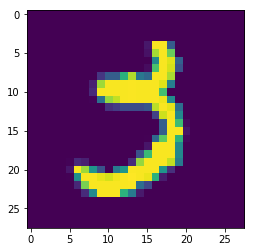

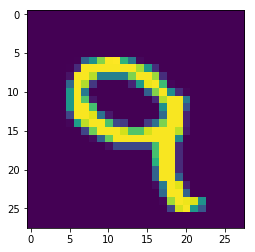

In [51]:
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    # Restore model weights from previously saved model
    saver.restore(sess, model_path)

    # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval(
        {x: mnist.test.images, y: mnist.test.labels}))

    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval, predv = sess.run([output, pred], feed_dict={x: batch_xs})
    print(outputval, predv, batch_ys)

    im = batch_xs[0]
    im = im.reshape(-1, 28)
    pylab.imshow(im)
    pylab.show()

    im = batch_xs[1]
    im = im.reshape(-1, 28)
    pylab.imshow(im)
    pylab.show()